### Prediction using Decision Tree Algorithm
#### The Sparks Foundation Task 6
#### Author: Tanmay Arora
The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

#### Importing the Header Files and Loading the Dataset

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df['target'] = iris_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# checking for null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### Splitting The Data and Training The Algorithm

In [5]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[iris_data.feature_names], df['target'], random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt_c=DecisionTreeClassifier(max_depth=None,max_features=None)
dt_c.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
dt_c.score(X_train,y_train)

1.0


The model performs well on trainig data but not efficient on test data which leads to overfitting.

#### Making Predictions and Evaluating The Model

In [9]:
y_pred = dt_c.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


Text(0.5, 15.0, 'Predicted label')

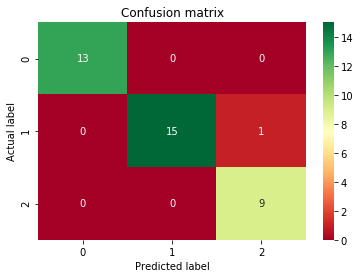

In [21]:
y_pred = dt_c.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap='RdYlGn' ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Visualizing the decision tree

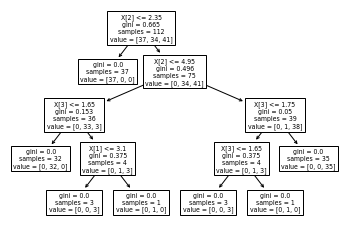

In [53]:
from sklearn import tree
tree.plot_tree(dt_c);

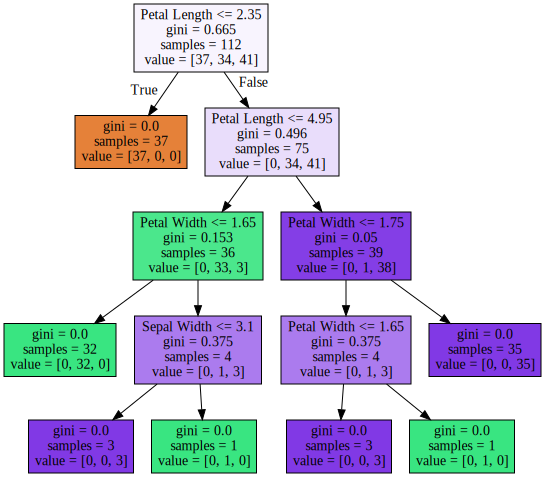

In [54]:
import graphviz 
from sklearn import tree
f = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
c =  ['Setosa', 'Versicolor', 'Virginica']
d = tree.export_graphviz(dt, feature_names = f, filled=True)
dtree = graphviz.Source(d, format="png") 
dtree